## t-test 연습 2.

데이터 셋: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

위 데이터 셋은 넷플릭스 오리지널 시리즈의 메타 데이터와 평점을 담은 데이터 셋입니다. 지금까지 배운 시각화와 통계 기법들을 활용하여 넷플릭스의 데이터 분석가가 되었다고 생각하고 데이터를 통해서 인사이트를 전달해보세요.

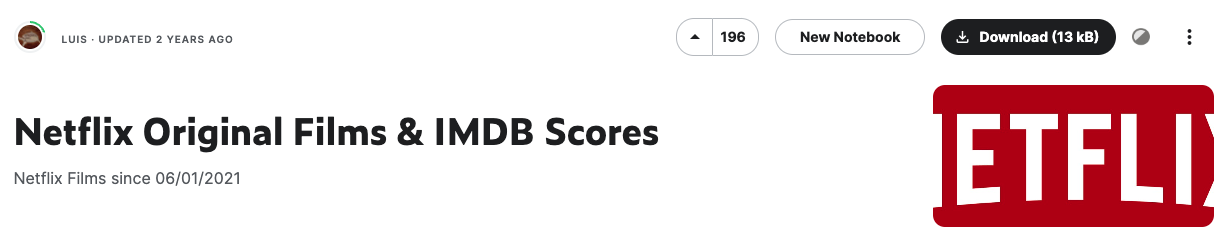

## 요구 사항
- 기본적인 EDA와 시각화를 해주세요. 
- t-test 기법을 다양하게 사용해보세요.
- 통계적 근거를 활용하여 오리지널 시리즈 제작 방향에 대한 제언을 해보세요. 
- 결과물을 velog에 기록해주세요. (선택)

# EDA 및 시각화 작업

In [8]:
import pandas as pd

df = pd.read_csv("./data/NetflixOriginals.csv", encoding="latin1")

In [9]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [10]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [11]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [12]:
# Genre 카테고리

df['Genre'].value_counts()
df['Genre'].value_counts().sum()
genre =df['Genre'].value_counts()

genre

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: count, Length: 115, dtype: int64

In [13]:
# Top3 Genre

genre_counts = df['Genre'].value_counts()
top3_genres = genre_counts.head(3)
print("Top 3 genres:")
print(top3_genres)

Top 3 genres:
Genre
Documentary    159
Drama           77
Comedy          49
Name: count, dtype: int64


In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=top3_genres.index,y=top3_genres.values,data=df,color='green')
plt.xlabel('Top 3 Genres in Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

NameError: name 'plt' is not defined

In [15]:
# printing unique values of Language
df.Language.unique()
df.Language.value_counts()

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georg

In [16]:
# Top3 Language

language_counts = df['Language'].value_counts()
top3_languages = language_counts.head(3)
print("Top 3 languages:")
print(top3_languages)

# 힌디 언어가 2위인게 의외다

Top 3 languages:
Language
English    401
Hindi       33
Spanish     31
Name: count, dtype: int64


In [17]:
# 시각화

plt.figure(figsize=(12,8))
sns.barplot(x=top3_languages.index,y=top3_languages.values,data=df,color='green')
plt.xlabel('Top 3 Languages in Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

NameError: name 'plt' is not defined

In [18]:
# Top3 IMDB Score (양적 기준)

IMDB_counts = df['IMDB Score'].value_counts()
top3_IMDBs = IMDB_counts.head(3)
print("Top 3 IMDBs:")
print(top3_IMDBs)

# 대체로 좋은 평을 받은 작품들은 5~7점대다 (10점 만점 기준)

Top 3 IMDBs:
IMDB Score
5.8    30
6.3    30
7.1    28
Name: count, dtype: int64


In [19]:
# 한국 작품들 중 높은 IMDB 점수를 보이는 장르는?

df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')
top_imdb_korean = df[df['Language'] == "Korean"]
top_imdb_korean = top_imdb_korean.groupby(['Language','Genre','Title']).mean().sort_values(by=["IMDB Score"],ascending=False)[:10]
top_imdb_korean

Premiere  Runtime  \
Language Genre           Title                                             
Korean   Documentary     Blackpink: Light Up the Sky 2020-10-14     79.0   
         Drama           Night in Paradise           2021-04-09    132.0   
         Science fiction Space Sweepers              2021-02-05    136.0   
         Thriller        Time to Hunt                2020-04-23    134.0   
         Comedy          What Happened to Mr. Cha?   2021-01-01    102.0   
         Drama           The Call                    2020-11-27    112.0   

                                                      IMDB Score  
Language Genre           Title                                    
Korean   Documentary     Blackpink: Light Up the Sky         7.5  
         Drama           Night in Paradise                   6.7  
         Science fiction Space Sweepers                      6.6  
         Thriller        Time to Hunt                        6.3  
         Comedy          What Happened to Mr. Cha?           4.3  
         Drama           The Call                            4.1

In [20]:
# Top3 Runtime

runtime_counts = df['Runtime'].value_counts()
top3_runtimes = runtime_counts.head(3)
print("Top 3 runtimes:")
print(top3_runtimes)

# 100분을 넘기지 않는 것이 좋다

Top 3 runtimes:
Runtime
97    24
98    19
94    19
Name: count, dtype: int64


In [21]:
# Top3 Title

title_counts = df['Title'].value_counts()
top3_titles = title_counts.head(3)
print("Top 3 titles:")
print(top3_titles)

# 탈룰라...?

Top 3 titles:
Title
Enter the Anime                                 1
Have a Good Trip: Adventures in Psychedelics    1
Tallulah                                        1
Name: count, dtype: int64


In [22]:
# Top3 Premiere

premiere_counts = df['Premiere'].value_counts()
top3_premieres = premiere_counts.head(3)
print("Top 3 premieres:")
print(top3_premieres)

# 10월, 11월작이 대체로 인기가 많았다

Top 3 premieres:
Premiere
2020-10-02    6
2019-10-18    5
2019-11-01    5
Name: count, dtype: int64


In [40]:
for i in range(len(df[“Premiere”])):
    df[“Premiere_year”].iloc[i] = df[“Premiere”].iloc[i][-4:]
    df[“Premiere_date”].iloc[i] = df[“Premiere”].iloc[i][:-6]
df

SyntaxError: invalid character '“' (U+201C) (916791122.py, line 1)

In [23]:
# year, month, weekday 나누기

df['Premiere'] = pd.to_datetime(df['Premiere'])

df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')
# columns year, month and weekday
df['year']    = df['Premiere'].dt.year
df['month']   = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()

df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019.0,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020.0,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019.0,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018.0,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020.0,October,Friday
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018.0,December,Monday
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015.0,October,Friday
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018.0,December,Sunday
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020.0,December,Tuesday


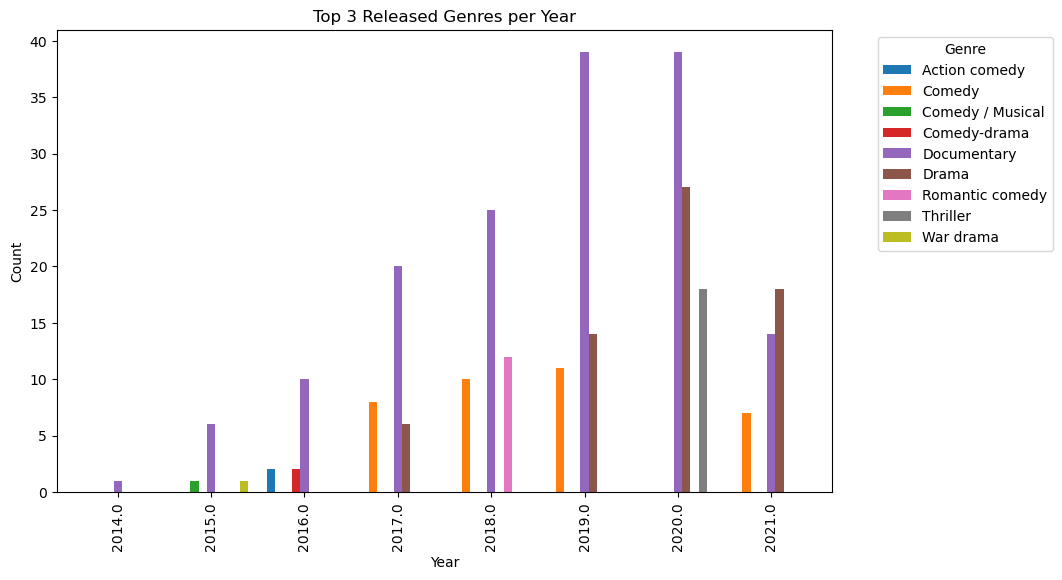

In [62]:
# 연도별 Top3 Genres

import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Genre, then count the occurrences
genre_counts = df.groupby(['year', 'Genre']).size().reset_index(name='Count')

# Find the top 3 genres for each year
top3_genres = genre_counts.groupby('year').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Pivot the DataFrame to have genres as columns
pivot_df = top3_genres.pivot(index='year', columns='Genre', values='Count').fillna(0)

# Plot a regular (not stacked) bar graph
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)  # Adjust width as needed
plt.title('Top 3 Released Genres per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

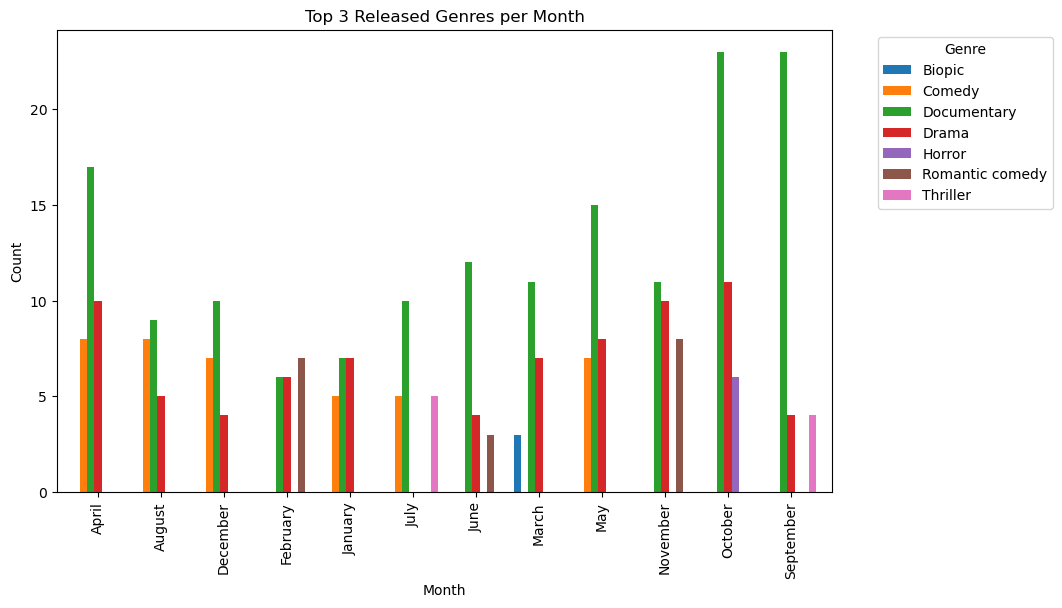

In [63]:
# 월별 Top3 Genres


import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Genre, then count the occurrences
genre_counts = df.groupby(['month', 'Genre']).size().reset_index(name='Count')

# Find the top 3 genres for each year
top3_genres = genre_counts.groupby('month').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Pivot the DataFrame to have genres as columns
pivot_df = top3_genres.pivot(index='month', columns='Genre', values='Count').fillna(0)

# Plot a regular (not stacked) bar graph
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)  # Adjust width as needed
plt.title('Top 3 Released Genres per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

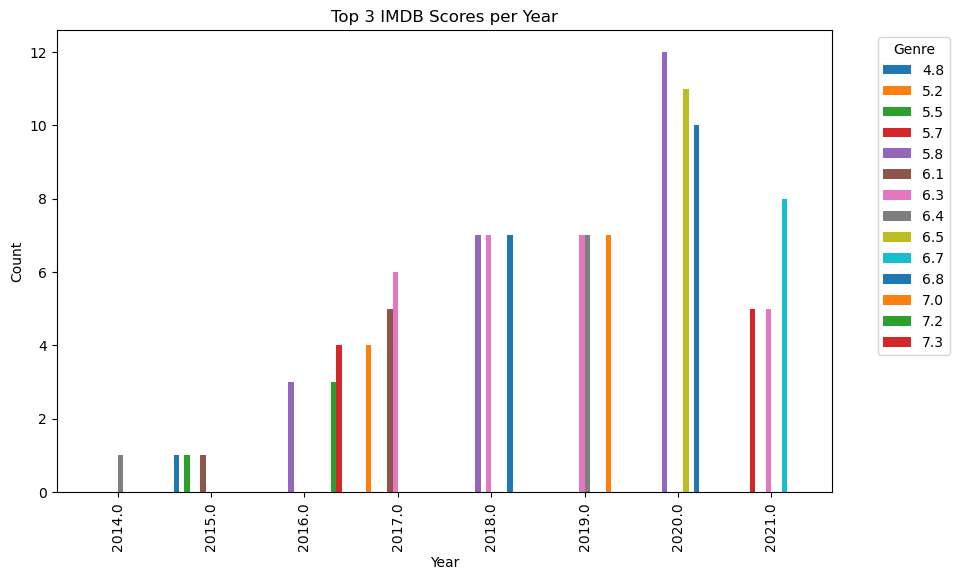

In [68]:
# 연도벌 Top3 IMDB Scores


import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Genre, then count the occurrences
genre_counts = df.groupby(['year', 'IMDB Score']).size().reset_index(name='Count')

# Find the top 3 genres for each year
top3_genres = genre_counts.groupby('year').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Pivot the DataFrame to have genres as columns
pivot_df = top3_genres.pivot(index='year', columns='IMDB Score', values='Count').fillna(0)

# Plot a regular (not stacked) bar graph
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)  # Adjust width as needed
plt.title('Top 3 IMDB Scores per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

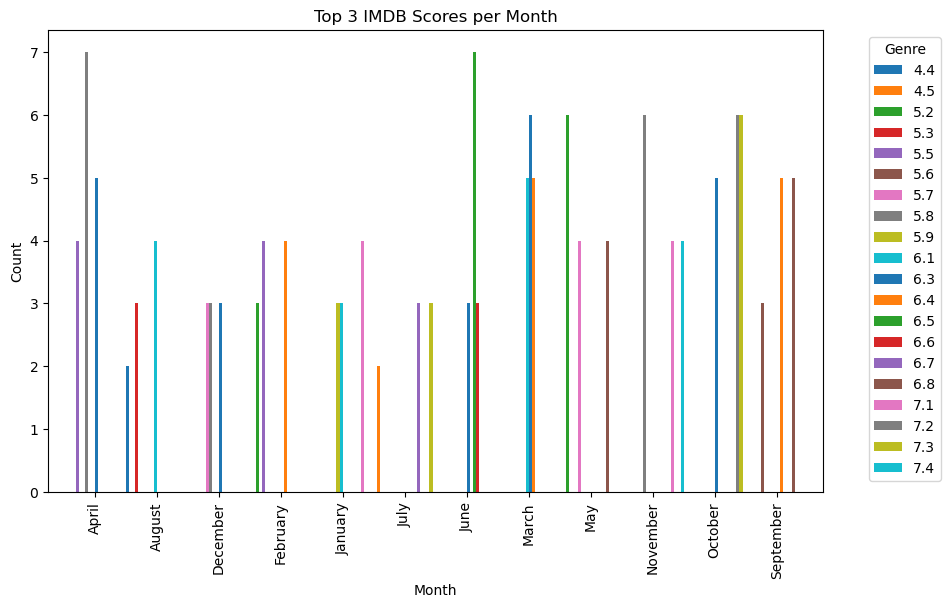

In [90]:
# 월벌 Top3 IMDB Scores


import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Genre, then count the occurrences
genre_counts = df.groupby(['month', 'IMDB Score']).size().reset_index(name='Count')

# Find the top 3 genres for each year
top3_genres = genre_counts.groupby('month').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Pivot the DataFrame to have genres as columns
pivot_df = top3_genres.pivot(index='month', columns='IMDB Score', values='Count').fillna(0)

# Plot a regular (not stacked) bar graph
pivot_df.plot(kind='bar', figsize=(10, 6), width=1.0)  # Adjust width as needed
plt.title('Top 3 IMDB Scores per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [67]:
# Top3 IMDB Scores (높은 점수 기준)

top_films = df.nlargest(3, 'IMDB Score')

print("Top IMDB Scores:")
print(top_films)

Top IMDB Scores:
                                         Title         Genre   Premiere  \
583   David Attenborough: A Life on Our Planet   Documentary 2020-10-04   
582  Emicida: AmarElo - It's All For Yesterday   Documentary 2020-12-08   
581                    Springsteen on Broadway  One-man show 2018-12-16   

     Runtime  IMDB Score    Language    year     month  weekday  
583       83         9.0     English  2020.0   October   Sunday  
582       89         8.6  Portuguese  2020.0  December  Tuesday  
581      153         8.5     English  2018.0  December   Sunday  


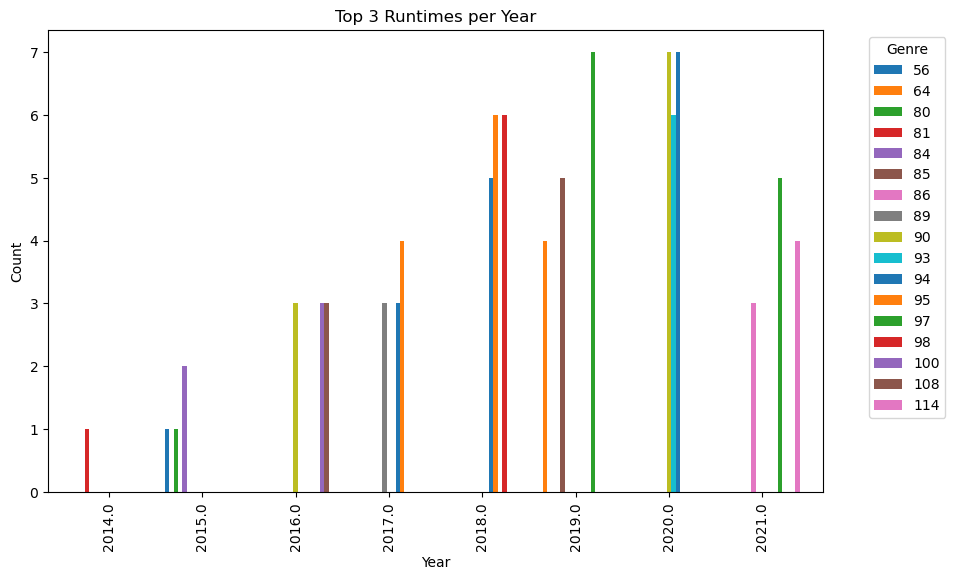

In [69]:
# 연도별 Top3 Runtime

import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Genre, then count the occurrences
genre_counts = df.groupby(['year', 'Runtime']).size().reset_index(name='Count')

# Find the top 3 genres for each year
top3_genres = genre_counts.groupby('year').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Pivot the DataFrame to have genres as columns
pivot_df = top3_genres.pivot(index='year', columns='Runtime', values='Count').fillna(0)

# Plot a regular (not stacked) bar graph
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)  # Adjust width as needed
plt.title('Top 3 Runtimes per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [80]:
# year, IMDB Score 상관관계

df[['year','IMDB Score']].corr()

,year,IMDB Score
year,1.000000,-0.134122
IMDB Score,-0.134122,1.000000


In [83]:
# Runtime, IMDB Score 상관관계

df[['Runtime','IMDB Score']].corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


In [86]:
list = ["Thriller", "Horror", "Zombie"]
df[(df["month"]==10) & ((df["Genre"]=="Thriller") | (df["Genre"]=="Horror") | (df["Genre"]=="Zombie/Heist"))]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday,IMDB_Score


In [87]:
df[df["Genre"]=="Horror"]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday,IMDB_Score
31,I Am the Pretty Thing That Lives in the House,Horror,2016-10-28,89,4.6,English,2016.0,October,Friday,4.6
34,Rattlesnake,Horror,2019-10-25,85,4.6,English,2019.0,October,Friday,4.6
46,Nobody Sleeps in the Woods Tonight,Horror,2020-10-28,103,4.8,Polish,2020.0,October,Wednesday,4.8
59,Cadaver,Horror,2020-10-22,86,5.1,Norwegian,2020.0,October,Thursday,5.1
71,Ghost Lab,Horror,2021-05-26,117,5.2,Thai,2021.0,May,Wednesday,5.2
90,Things Heard & Seen,Horror,2021-04-29,121,5.3,English,2021.0,April,Thursday,5.3
101,In the Tall Grass,Horror,2019-10-04,101,5.4,English,2019.0,October,Friday,5.4
146,Eli,Horror,2019-10-18,98,5.7,English,2019.0,October,Friday,5.7
348,Bulbbul,Horror,2020-06-24,94,6.6,Hindi,2020.0,June,Wednesday,6.6


In [3]:
df.groupby(["Language"])[["IMDB Score", "Runtime"]].mean()

,IMDB Score,Runtime
Language,,
Bengali,7.100000,41.000000
Dutch,5.800000,99.666667
English,6.380050,91.817955
English/Akan,7.700000,136.000000
English/Arabic,7.300000,114.000000
English/Hindi,7.300000,32.500000
English/Japanese,4.400000,89.000000
English/Korean,7.300000,121.000000
English/Mandarin,7.050000,59.000000


In [8]:
df.groupby(["Language"]=[["English", "Hindi", "Spanish", "French", "Italian"]][["IMDB Score", "Runtime"]].mean()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1411953696.py, line 1)

In [75]:
# 인사이트 정리 및 방향성 구축

# 1. 한국 작품은 그렇다면 어떠한 방향으로 나아가는 것이 좋을까?
# 2. 가설 세우기

# 3. t-test(Paired Sample)
# 4. 근거 및 결론

# 할로윈 시즌에 공포 영화가 많이 나올 것이라 생각했는데...

In [ ]:
액션 장르의 스코어 평균
드라마 장르이 스코어 평균

연도별

언어별


개봉 요일 금요일이 제일 많다
제일 적은게 토요일 일요일 아예 X
요일의 평균이 같은가 다른가

의외였던 점:
    - 힌디 (인도 인구수, 자본)
    - 영어 작품은 다큐가 많다, 한국 작품은 거의 드라마 영화, 예능 (문화적 차이? + 자본 능력)
    - 너무 오래된 데이터 아쉬움
    - 도파민 중독
    - 아시아권, 우리나라 보수적 (불륜 소재 자극 받는)
    - 2020년 작품수 코로나19 영향 (근데 왜 21년도는 확 줄어들었나?)
    - 개봉 요일
    - 
    
    
<의외인 점>
힌디어 2위 => 인구수, 자본에 근거했을 것이다
영어작품에 다큐가 대부분, 근데 한국은 드라마가 강세 => 아무래도 문화적 차이가 아닌가...다양한 걸 시도하는 문화? 아니면 자본일 수도..
        -> 혹시,,,,서양권은 불륜과 같은 주제에 별 감흥?이 없어서 그런 게 아닌가
        -> 문화적 차이가 맞는듯ㅇㅇ(+기사 첨부하면 좋을 듯)
요일 => 금요일에 많이 개봉하는 이유? -> 미국 기준으로 하면 토요일이긴 함
아쉬운점 -> 2년 전에 업데이트가 끝난 데이터라 한국 데이터가 너무 부족함ㅠ

호러 => 한국 기준으로 여름(6-8월)에 많이 나올 거라고 예상했는데 10월에 가장 많았음
     -> 서양은 할로윈을 챙기니까 10월에 호러 영화가 많이 나온게 아닌가 예상함

개봉작 수 => 20년에비해 21년에 개봉한 작품수는 절반 이상 차이남 -> 21년 6월까지 집계한 데이터라 하반기 개봉은 들어가지 않았음(근데 그래도 20년 개봉수는 못 따라갈 듯?)

장르 => 서양권은 다큐가 많고, 보수국가에서는 드라마가 많다 -> 약간 도파민에 중독되다 못해 절여진 뇌 때문이지 않을까..자극적인 주제에 대한 문화적 차이이지 않을까 예상함
+) 공중파에서는 내보내지 못하는 제약사항들이 OTT 플랫폼에서는 제약사항이 희미해지기때문에 그런게 아닐까-

<아쉬운 점>
한국 콘텐츠 다큐가 적다 (k-pop, 고발하는 내용)
자본이 한정적이라 

# T-test (Two Sample)

In [ ]:
# 귀무가설: 19년도와 20년도의 런타임 평균의 차는 0이다.
# 대립가설: 19년도와 20년도의 런타임 평균의 차는 0이 아니다.

# 귀무가설: 19년도와 20년도의 점수 평균의 차는 0이다.
# 대립가설: 19년도와 20년도의 점수 평균의 차는 0이 아니다.

# 귀무가설: 영어로 된 작품과 힌디로 된 작품의 런타임의 차는 0이다.
# 대립가설: 영어로 된 작품과 힌디로 된 작품의 런타임의 차는 0이 아니다.

# 귀무가설: 영어로 된 작품과 힌디로 된 작품의 점수 평균의 차는 0이다.
# 대립가설: 영어로 된 작품과 힌디로 된 작품의 점수 평균의 차는 0이 아니다.

# 귀무가설: 다큐로 된 작품과 드라마로 된 작품의 런타임의 차는 0이다.
# 대립가설: 다큐로 된 작품과 드라마로 된 작품의 런타임의 차는 0이 아니다.

# 귀무가설: 다큐로 된 작품과 드라마로 된 작품의 점수 평균의 차는 0이다.
# 대립가설: 다큐로 된 작품과 드라마로 된 작품의 점수 평균의 차는 0이 아니다.

# 귀무가설: 상반기와 하반기의 점수 평균의 차는 0이다.
# 대립가설: 상반기와 하반기의 점수 평균의 차는 0이 아니다.


<t-test 주제>
- 19년도와 20년도 런타임 평균 차이 (귀무가설 기각)
- 19년도와 20년도 점수 평균 차이 (귀무가설 채택)
- 영어 - 힌디 점수 평균 차이 (귀무가설 기각)
- 영어 - 힌디 런타임 평균 차이 (귀무가설 기각)
- 다큐 - 드라마 런타임/점수 평균 차이 (귀무가설 기각)
- 상/하반기 점수 평균 차이 (귀무가설 기각. 상반기하반기 평균 차이 없다?)

In [24]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019.0,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020.0,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019.0,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018.0,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020.0,October,Friday
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018.0,December,Monday
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015.0,October,Friday
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018.0,December,Sunday
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020.0,December,Tuesday


In [ ]:
df[["Genre","IMDB Score"]].sort_values(by="IMDB Score")

In [ ]:
f[["Genre","IMDB Score"]].sort_values(by="IMDB Score").mean()
top_genres = genre_mean_scores.sort_values(ascending=False).head(20)

# 1) 19년도와 20년도 런타임 평균 차이

In [25]:
df[df["year"] == 2019].groupby("year")[["Runtime"]].mean()

,Runtime
year,
2019.0,87.379032


In [26]:
df[df["year"] == 2020].groupby("year")[["Runtime"]].mean()

,Runtime
year,
2020.0,94.994536


## 등분산 검정

In [27]:
from scipy import stats

test_names = ["Runtime"]

runtime_19 = df[df['year'] == 2019][['Runtime']]
runtime_20 = df[df['year'] == 2020][['Runtime']]

for test_name in test_names:
    _, p_value_levene = stats.levene(runtime_19[test_name], runtime_20[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

Runtime p-value: 0.027497831401053097, 이분산 가정 만족


## t-test 수행

In [28]:
t_statistic, p_value = stats.ttest_ind(
    a=runtime_19,
    b=runtime_20,
    alternative="two-sided",
    equal_var=False
)

In [29]:
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.03877156]
귀무 가설 기각: [ True]


In [30]:
# p-value가 유의수준보다 작게 나왔으므로 귀무가설을 기각하고 대립가설을 채택한다.
# 대립가설 채택: 19년도와 20년도 런타임의 평균은 차이가 있다.
# 인사이트:

## 단측검정

In [33]:
t_statistic, p_value = stats.ttest_ind(
    a=runtime_20,
    b=runtime_19,
    alternative="greater",
    equal_var=False
)

In [34]:
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.01938578]
귀무 가설 기각: [ True]


In [ ]:
# p-value가 유의수준보다 작게 나왔으므로 귀무가설을 기각하고 대립가설을 채택한다.
# 귀무가설: 20년도 평균과 19년도 평균의 차이는 없다.
# 대립가설: 20년도 평균이 19년도 평균보다 더 크다. (통계적으로 유의하게 높다고 볼 수 있다)

# 2) 19년도와 20년도 점수 평균 차이

In [85]:
df[df["year"] == 2019].groupby("year")[["IMDB Score"]].mean()

,IMDB Score
year,
2019.0,6.265323


In [86]:
df[df["year"] == 2020].groupby("year")[["IMDB Score"]].mean()

,IMDB Score
year,
2020.0,6.195082


## 등분산 검정

In [87]:
from scipy import stats

test_names = ["IMDB Score"]

runtime_19 = df[df['year'] == 2019][['IMDB Score']]
runtime_20 = df[df['year'] == 2020][['IMDB Score']]

for test_name in test_names:
    _, p_value_levene = stats.levene(runtime_19[test_name], runtime_20[test_name])
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

IMDB Score p-value: 0.9367002810123254, 등분산 가정 만족


## t-test 수행

In [88]:
t_statistic, p_value = stats.ttest_ind(
    a=runtime_19,
    b=runtime_20,
    alternative="two-sided",
    equal_var=True
)

In [89]:
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.56744332]
귀무 가설 기각: [False]


In [ ]:
# p-value가 유의수준보다 크게 나왔으므로 귀무가설을 채택하고 대립가설을 기각한다.
# 귀무가설 채택: 19년도와 20년도 점수의 평균은 차이가 없다.
# 인사이트: 